In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

### Understanding of the Content

Let M be a sample random walk. Let two increments of M be __t__ and __s__ such __t > s__. If X is the random variable such that the sum of which becomes a random walk, then the difference or the delta of the random walk is the sum of the random variable from s+1 to t. 

$$
M(t) - M(s) = \sum_{i=s+1}^{t} X_i
$$

Additionally, the Variation will be the following:
$$
Var[ M(t) - M(s) ] = \sum_{i=s+1}^{t} Var[X_i]
$$


Where
$$
X_i = \begin{cases} 
      1 & \text{if Heads} \\
      -1 & \text{if Tails} 
   \end{cases}
$$
Because the variation of X_i is 1, as 
$$\sum_{i=s+1}^{t} Var[X_i] = \sum_{i=s+1}^{t} 1 = t - s $$

Then, we are going to define quadradic variation of M upto time k which will be defined as the following:
$$ \sum_{i=1}^{k} (M_{i + 1} - M_i)^2 = \sum_{i=1}^{k} 1^2 = k$$

Now we introduce another parameter n which is the step size of brownian motion. Also ensure that n is a positive number so that we have the following definition of the Weiner Process:
$$
W(n, t) = \frac{1}{\sqrt{n}}M(nt)
$$

The following definition is made so that the expected value of W is 0 and that the variation between two increments is equal to the difference between the times:
$$
Var[W(n, t) - W(n, s)] = t - s
$$

However, to formalize the process, we need n to approach infinity. When that happens the sum of bernouli random variables tends to approximate a normal distribution by the central limit theorem which is why X will take a normal distribution now. 

### Brownian Motion



#### Setup
Let H represent the number of Heads and T be the number of tails in nt trails which means both of which are scaled appropriately:
$$ nt = H_{nt} + T_{nt} $$
$$ M_{nt} = H_{nt} - T_{nt}$$

Consider a Stock Price S(t) such that it moves up by a factor of u and moves down by a factor of d depending on whether the coin flip landed on heads or tails. So that means the following is true:
$$ S(t) = S(0)u^Hd^T $$

Now we will let u and d be:
$$ u = 1 + \frac{\sigma}{\sqrt{n}} \text{and} d = 1 - \frac{\sigma}{\sqrt{n}} $$

*From What I understand*. The sqrt(n) term is there to ensure that the overall variance for the scaled walk will remain t. The sigma term on the top represents the volatility of a stock which is usually calculated by finding the standard deviation of the stock upto time t. This means that the volatility is also a function of t which will become important later.

$$ S(t) = S(0)(1 + \frac{\sigma}{\sqrt{n}})^H (1 - \frac{\sigma}{\sqrt{n}})^T $$
$$ H = \frac{1}{2}(nt + M_{nt}) \text{  and  } T  = \frac{1}{2}(nt - M_{nt}) $$

$$ 
S(t) = S(0)(1 + \frac{\sigma}{\sqrt{n}})^{\frac{1}{2}(nt + M_{nt})} (1 - \frac{\sigma}{\sqrt{n}})^{\frac{1}{2}(nt - M_{nt})} 
$$

We want S(t) as n approaches infinity. This can be solved when you take the natural log of both sides and find a series approximation for ln(1+x). In the end, it simplifies to:

$$ S(t) = S(0)e^{\sigma W(t) - \frac{1}{2}\sigma ^2t} $$

#### Quadradic Variation of the Weiner Process

$$
 \sum_{i=1}^{nt} (W_{i + 1} - W_i)^2 = t
$$

Thus through some calculations we will also find that ΔW^2 = dt or more informally written as dW*dW = dt. Which is why often we will see dW = sqrt(dt).

In [102]:
dW = np.random.normal(size=999)*0.1

W = [0]
for i in range(999):
    W.append(W[i] + dW[i])
    


In [103]:
t = [_ for _ in range(1000)]

Text(0, 0.5, 'Brownian Motion')

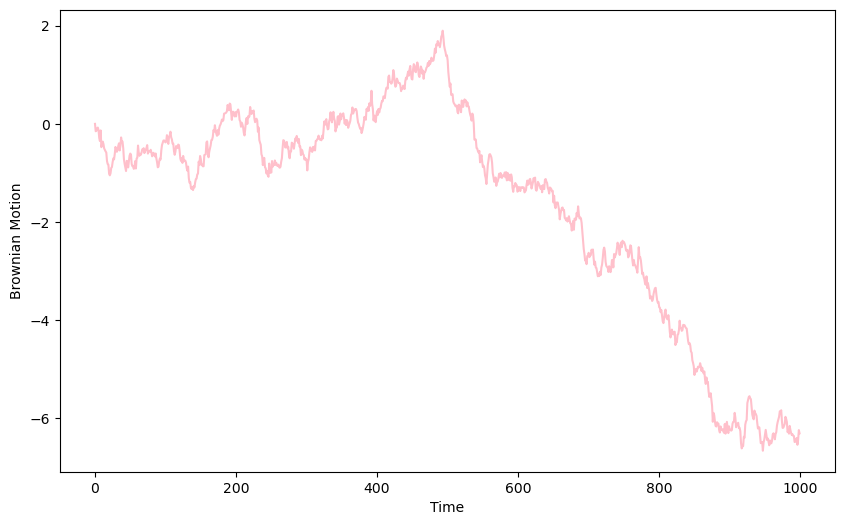

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(t, W, label="Brownian Motion", color='pink')
plt.xlabel("Time")
plt.ylabel("Brownian Motion")

## Asset Price using Brownian Motion

In [105]:
sigma = 0.05
up = lambda x: sigma*W[x] - 0.5 * (sigma**2)*x


In [106]:
upper = np.frompyfunc(up, 1, 1)
up_t = np.array(upper(t)).astype(float)
S = np.exp(up_t)

Text(0, 0.5, 'Asset Price')

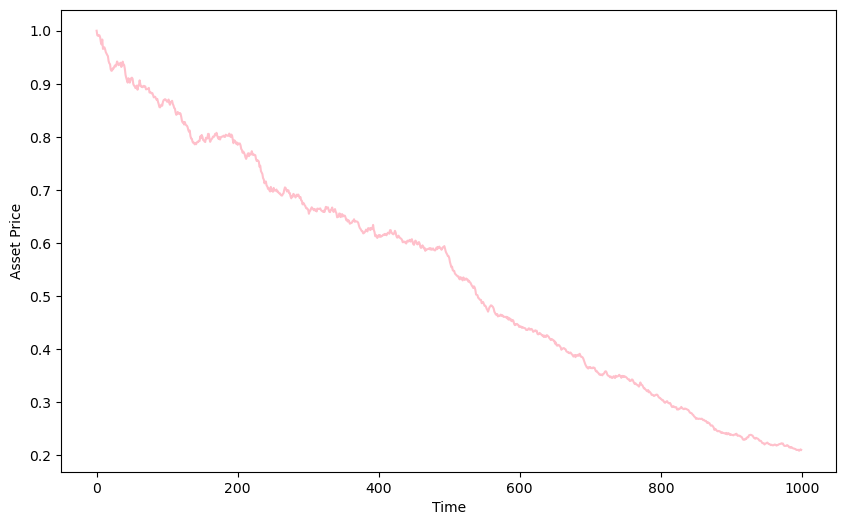

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(t, S, label="Asset Price using Brownian Motion", color='pink')
plt.xlabel("Time")
plt.ylabel("Asset Price")

## Asset Price using Geometric Brownian Motion

Setup:
$$ dS(t) = S(t)(\mu dt + \sigma dW)$$

In [7]:
dt = 0.001
sigma = 0.1
mu = -0.2

S = [100]
W = [0]
total_time = 1
t_inc = int(total_time / dt)
T = [dt*i for i in range(t_inc)]
t_inc_array = [i for i in range(t_inc)]

for i in range(t_inc - 1):
    dW = np.random.normal()*np.sqrt(dt)
    W.append(W[i] + dW)
    dS = S[i]* (mu*dt + sigma*dW)
    S.append(S[i] + dS)
    
    



Text(0, 0.5, 'Asset Price')

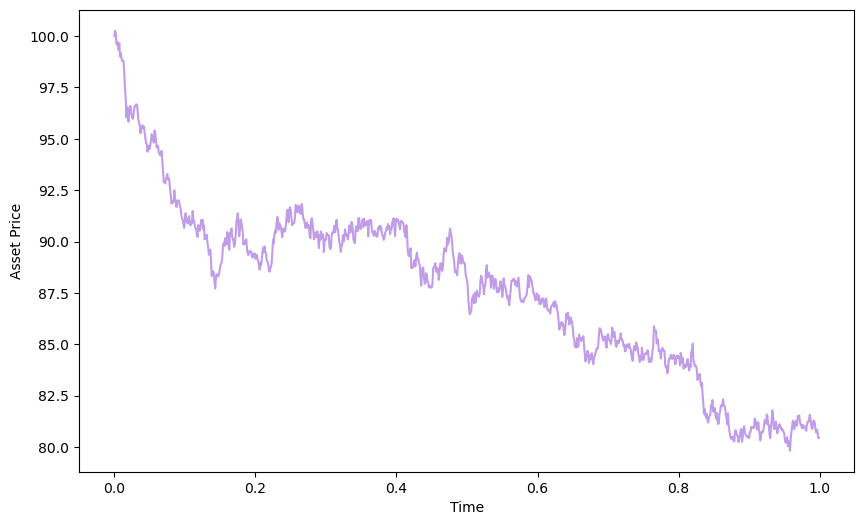

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(T, S, label="Asset Price using Geometric Brownian Motion", color='#c19ce9')
plt.xlabel("Time")
plt.ylabel("Asset Price")

Text(0, 0.5, 'Brownian Motion')

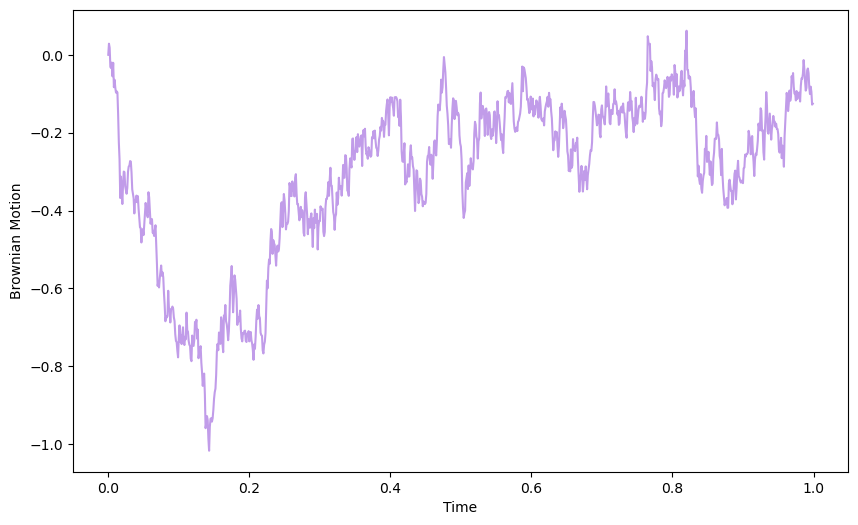

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(T, W, label="Asset Price using Geometric Brownian Motion", color='#c19ce9')
plt.xlabel("Time")
plt.ylabel("Brownian Motion")

Quick Note on the graph for the asset price. Notice how it dropped roughly 20% and how mu = -0.2. This illustrates how the drift factor affects the overall stochastic process